# Causal Effect of Elon Musk on $DOGE Coin
## Data88e Fall 21 Demo Notebook
### Notebook by Hector Juarez-Vargas with inspiration from Fabian Dablander, PhD.
 

If you think of Dogecoin - the cryptocurrency based on a meme - you can't help but think of Elon Musk. 2021 has been an interesting time for Dogecoin, and Musk's public comments about the crypto might be one of the reasons why; he's taken Doge under his wing and constantly brings the currency into the spotlight via Twitter (he has 58.2 million followers!). While correlation is not always causation, let's still try our best to see how Musk's tweet correlate with Dogecoin's stock price.

In [10]:
from datascience import *
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

%matplotlib inline 
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import requests 

Notoriously for swinging stock prices by his tweets alone, Elon Musk tweeted this on May 1st, 2020: 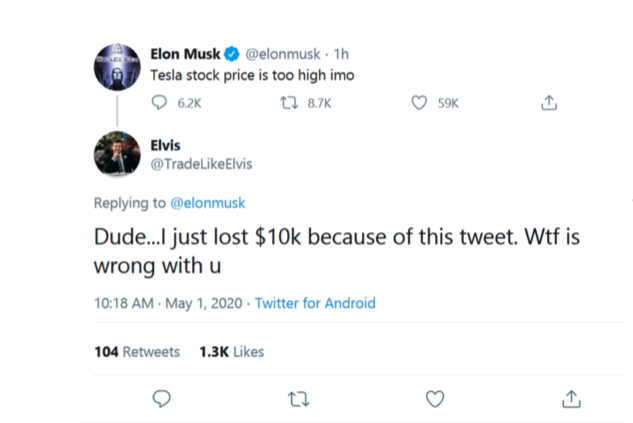   

The SEC (United States' Securities and Exchange Commisssion) said that the tweet was subject to review since it addressed the company's financial conditon.   


In [11]:
#Data for Tesla and SNP 500 stock prices. Tesla data has TSLA sticker and SNP 500 has SPY sticker.
tesla_data = pd.read_csv('tesla-data.csv')
tesla_data

,ticker,date,open,high,low,close,volume
0,TSLA,2020-05-01 13:30:00,754.965,762.530,754.965,762.440,786
1,TSLA,2020-05-01 13:31:00,760.050,760.050,755.320,759.200,811
2,TSLA,2020-05-01 13:32:00,758.420,759.990,756.795,759.990,854
3,TSLA,2020-05-01 13:33:00,757.960,764.850,756.220,764.850,760
4,TSLA,2020-05-01 13:34:00,766.300,772.550,765.440,771.565,3752
...,...,...,...,...,...,...,...
657,SPY,2020-05-01 18:56:00,282.320,282.540,282.290,282.480,2083
658,SPY,2020-05-01 18:57:00,282.480,282.505,282.360,282.420,723
659,SPY,2020-05-01 18:58:00,282.430,282.585,282.395,282.515,2095
660,SPY,2020-05-01 18:59:00,282.515,282.640,282.445,282.540,2295


In [12]:
#Function made to create graphs
def simplegraph(x, y, label, xlabel, ylabel, title, xvalues, labels, labeldirection, *args):
    plt.plot(x, y, linewidth = 2)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(xvalues, labels, rotation = labeldirection)
    for val in args: 
        plt.axvline(x = val, color = 'r', linewidth = .8)
        

In [13]:
#Selecting values for making the Tesla and SNP 500 graphs around the time of Elon's Tweet
tesla_data = pd.read_csv('tesla-data.csv')
tesla_data_only = tesla_data[tesla_data['ticker'] == 'TSLA']

labels = ['14:00','15:00','16:00', '17:00','18:00', '19:00']
xvalues = ['2020-05-01 14:00:00','2020-05-01 15:00:00','2020-05-01 16:00:00', '2020-05-01 17:00:00', '2020-05-01 18:00:00', '2020-05-01 19:00:00']


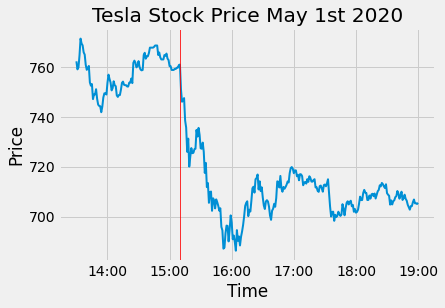

In [14]:
#Graph of Tesla's stock price around Elon's tweet. Notice how price takes a huge drop off in the y-axis
simplegraph(tesla_data_only['date'], tesla_data_only['close'], 'Tesla','Time', 'Price', 'Tesla Stock Price May 1st 2020', xvalues, labels, 'horizontal', '2020-05-01 15:10:00')

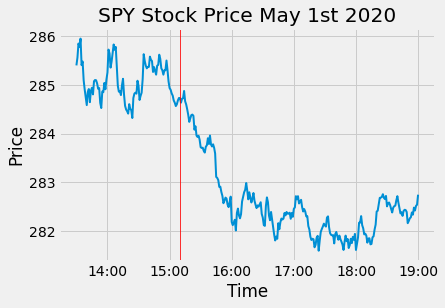

In [15]:
#Graph of SNP 500's stock price around Elon's tweet. Even though there is still a drop, notice how the drop is a lot smaller on the y-axis.
SPY_data_only = tesla_data[tesla_data['ticker'] == 'SPY']

simplegraph(SPY_data_only['date'], SPY_data_only['close'],'SPY', 'Time', 'Price', 'SPY Stock Price May 1st 2020', xvalues, labels, 'horizontal', '2020-05-01 15:10:00')


By 12 PM after Elon tweeted, the price of Tesla stock had tanked by over 10% in less than an hour. What a swing! That same day the SPY, the index used to track the S&P 500, decreased by less than 2% the entire day.


For now let's just assume that the stock plummeting was NOT a coincidence and that Elon Musk is capable of shifting the value of stocks and/or markets. What now? 

Let's bring our attention to two cryptocurrencies: Bitcoin and Dogecoin. Take a look at the dataset and consider the columns we can get rid of to simplify our lives a bit.

In [16]:
#Dataset for Dogecoin and Bitcoin monetary values.
doge1 = pd.read_csv('doge-data-1.csv')
doge1

,ticker,baseCurrency,quoteCurrency,date,open,high,low,close,volume,volumeNotional,tradesDone,crypto,n,price
0,dogebtc,doge,btc,2021-01-27 00:00:00,2.500000e-07,2.500000e-07,2.500000e-07,2.500000e-07,10003.000000,0.002501,2,Dogecoin,2,0.006694
1,dogebtc,doge,btc,2021-01-27 00:01:00,2.500000e-07,2.600000e-07,2.500000e-07,2.600000e-07,42717.000000,0.011106,2,Dogecoin,2,0.006958
2,dogebtc,doge,btc,2021-01-27 00:03:00,2.600000e-07,2.600000e-07,2.600000e-07,2.600000e-07,933.000000,0.000243,1,Dogecoin,2,0.006940
3,dogebtc,doge,btc,2021-01-27 00:04:00,2.600000e-07,2.600000e-07,2.600000e-07,2.600000e-07,628.000000,0.000163,1,Dogecoin,2,0.006927
4,dogebtc,doge,btc,2021-01-27 00:05:00,2.500000e-07,2.600000e-07,2.500000e-07,2.600000e-07,18007.000000,0.004682,2,Dogecoin,2,0.006915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7897,btceur,btc,eur,2021-01-29 23:56:00,2.819552e+04,2.833768e+04,2.817901e+04,2.833733e+04,1.698112,48119.952266,240,Bitcoin,2,28337.682682
7898,btceur,btc,eur,2021-01-29 23:57:00,2.832528e+04,2.835061e+04,2.829122e+04,2.831199e+04,4.200374,118920.936641,58,Bitcoin,2,28350.608681
7899,btceur,btc,eur,2021-01-29 23:58:00,2.831990e+04,2.833383e+04,2.828738e+04,2.831375e+04,1.700179,48138.435803,32,Bitcoin,2,28333.832349
7900,btceur,btc,eur,2021-01-29 23:59:00,2.827692e+04,2.831372e+04,2.821028e+04,2.821028e+04,5.479919,154590.053035,53,Bitcoin,2,28313.720000


We only really care about the ticker, the time, and the price of the cryptos, so we can throw away the other columns. The dataset captures data from the days before and after Elon Musk struck on Twitter yet again, posting this $DOGE meme on January 28th 



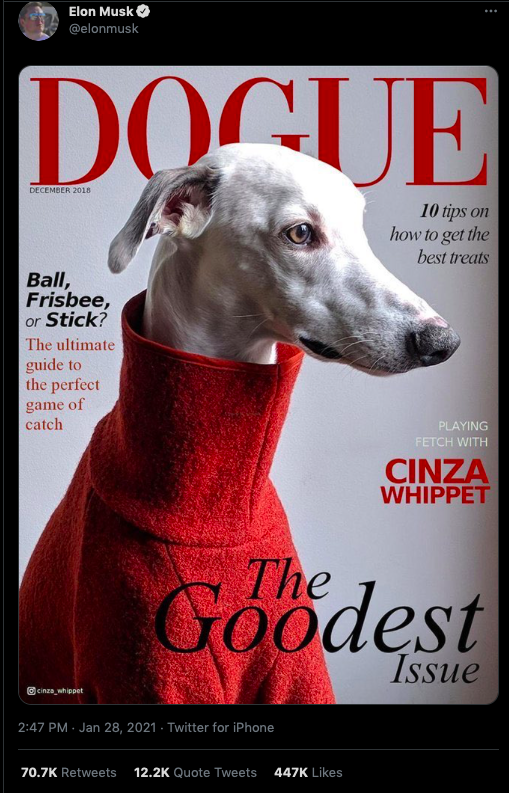

,ticker,date,price
0,dogebtc,2021-01-27 00:00:00,0.006694
1,dogebtc,2021-01-27 00:01:00,0.006958
2,dogebtc,2021-01-27 00:03:00,0.006940
3,dogebtc,2021-01-27 00:04:00,0.006927
4,dogebtc,2021-01-27 00:05:00,0.006915
...,...,...,...
7897,btceur,2021-01-29 23:56:00,28337.682682
7898,btceur,2021-01-29 23:57:00,28350.608681
7899,btceur,2021-01-29 23:58:00,28333.832349
7900,btceur,2021-01-29 23:59:00,28313.720000


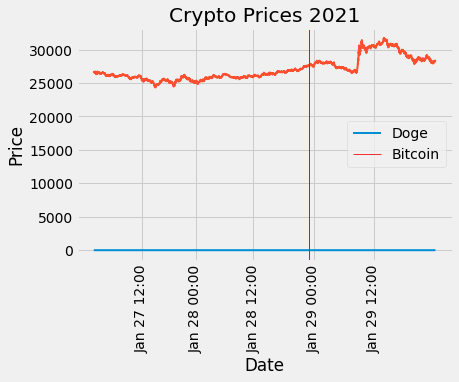

In [17]:
#Magic cell that makes the table and graphs of Bitcoin and Dogecoin values around Musk's tweet

ThrowAwayColumns = ['baseCurrency', 'quoteCurrency', 'open', 'high', 'low', 'close', 'volume', 'volumeNotional', 'tradesDone', 'crypto', 'n']
modded_tbl = doge1.drop(columns = ThrowAwayColumns)

#Separate the two cryptos into their own tables
modded_doge1 = modded_tbl[modded_tbl['ticker'] == 'dogebtc']
modded_btc1 = modded_tbl[modded_tbl['ticker'] == 'btceur']
display(modded_tbl)

labels = ['Jan 27 12:00','Jan 28 00:00','Jan 28 12:00', 'Jan 29 00:00', 'Jan 29 12:00']
xvalues = ['2021-01-27 12:00:00','2021-01-28 00:00:00','2021-01-28 12:01:00', '2021-01-29 00:00:00','2021-01-29 12:00:00' ]

simplegraph(modded_doge1['date'], modded_doge1['price'], 'Doge', 'Date', 'Price','$DOGE Price 2021', xvalues, labels, 'vertical', '2021-01-28 23:01:00')
simplegraph(modded_btc1['date'], modded_btc1['price'], 'Bitcoin','Date', 'Price', 'Crypto Prices 2021', xvalues, labels, 'vertical', '2021-01-28 23:01:00' )
plt.legend(['Doge', 'Bitcoin'])


As of right now it is impossible to analyze and compare the changes in values between the two because of the huge difference in price - Bitcoin is literally millions of times more expensive per coin than Dogecoin! While we still want to be able to graph them on the same plane, we need to do something to help us first. We'll standardize the data (which you will learn about in data 8), in order to compare their growths more effectively and proportional to their prices. 

In [18]:
#Function that standardizes all values in a series
def standardize(series): 
    usable_array = make_array(series)
    reshaped1 = usable_array.reshape(-1)
    reshaped2 = reshaped1.reshape(-1, 1)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(reshaped2)
    return scaled_data

In [19]:
#Data collected from up to 12 hours after the tweet. 
afterDoge = standardize((modded_doge1['price'][0:3200]))
afterBTC = standardize((modded_btc1['price'][0:3200]))
shortDate = modded_doge1['date'][0:3200]

In [20]:
Doge_mean = np.mean(modded_doge1['price'][0:3200])
Doge_std = np.std(modded_doge1['price'][0:3200])


print("The Doge mean value is {}".format(Doge_mean))
print("The Doge value's standard deviation is {}".format(Doge_std))

The Doge mean value is 0.014743419600088585
The Doge value's standard deviation is 0.0113140901957339


Top 5 Doge values: 


,ticker,date,price
2837,dogebtc,2021-01-29 05:03:00,0.059544
2836,dogebtc,2021-01-29 05:02:00,0.058925
2918,dogebtc,2021-01-29 06:30:00,0.058898
2839,dogebtc,2021-01-29 05:05:00,0.058439
2917,dogebtc,2021-01-29 06:29:00,0.058392


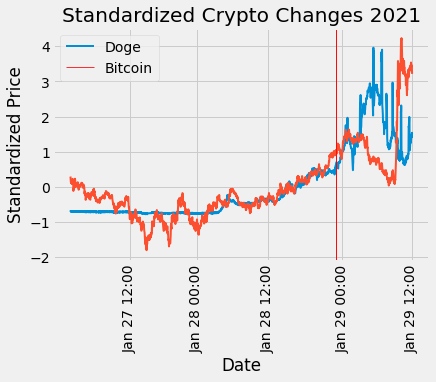

In [21]:
#Graphing standardized data
simplegraph(shortDate, afterDoge, 'Doge', 'Date', 'Price','$DOGE Price 2021', xvalues, labels, 'vertical', '2021-01-28 23:01:00'  )
simplegraph(shortDate, afterBTC, 'Bitcoin', 'Date', 'Standardized Price', 'Standardized Crypto Changes 2021', xvalues, labels, 'vertical', '2021-01-28 23:01:00' )
plt.legend(['Doge', 'Bitcoin'])

print('Top 5 Doge values: ')
modded_doge1[0:3200].sort_values('price', ascending = False).head()

We can see here that once Elon Musk tweets, the value of Doge skyrockets proportional to its previous price, peaking at nearly four standard deviations above its mean in the data, from .014 to .0595! This translates to a 425% peak increase in value from the mean during the span of 2.5 days. 


Because Bitcoin tracks the value of Doge relatively accurately in this analysis, we can try to use the value of Bitcoin to estimate what could have been the counterfactual value of Doge, had Musk not tweeted.

To find the counterfactual value of Doge had Musk not tweeted, we'll be using Google's [CausalImpact](https://google.github.io/CausalImpact/CausalImpact.html) package, which essentially helps us find the value of Dogecoin if there was never any outside intervention from Musk using Bitcoin price values as our control dataset. 

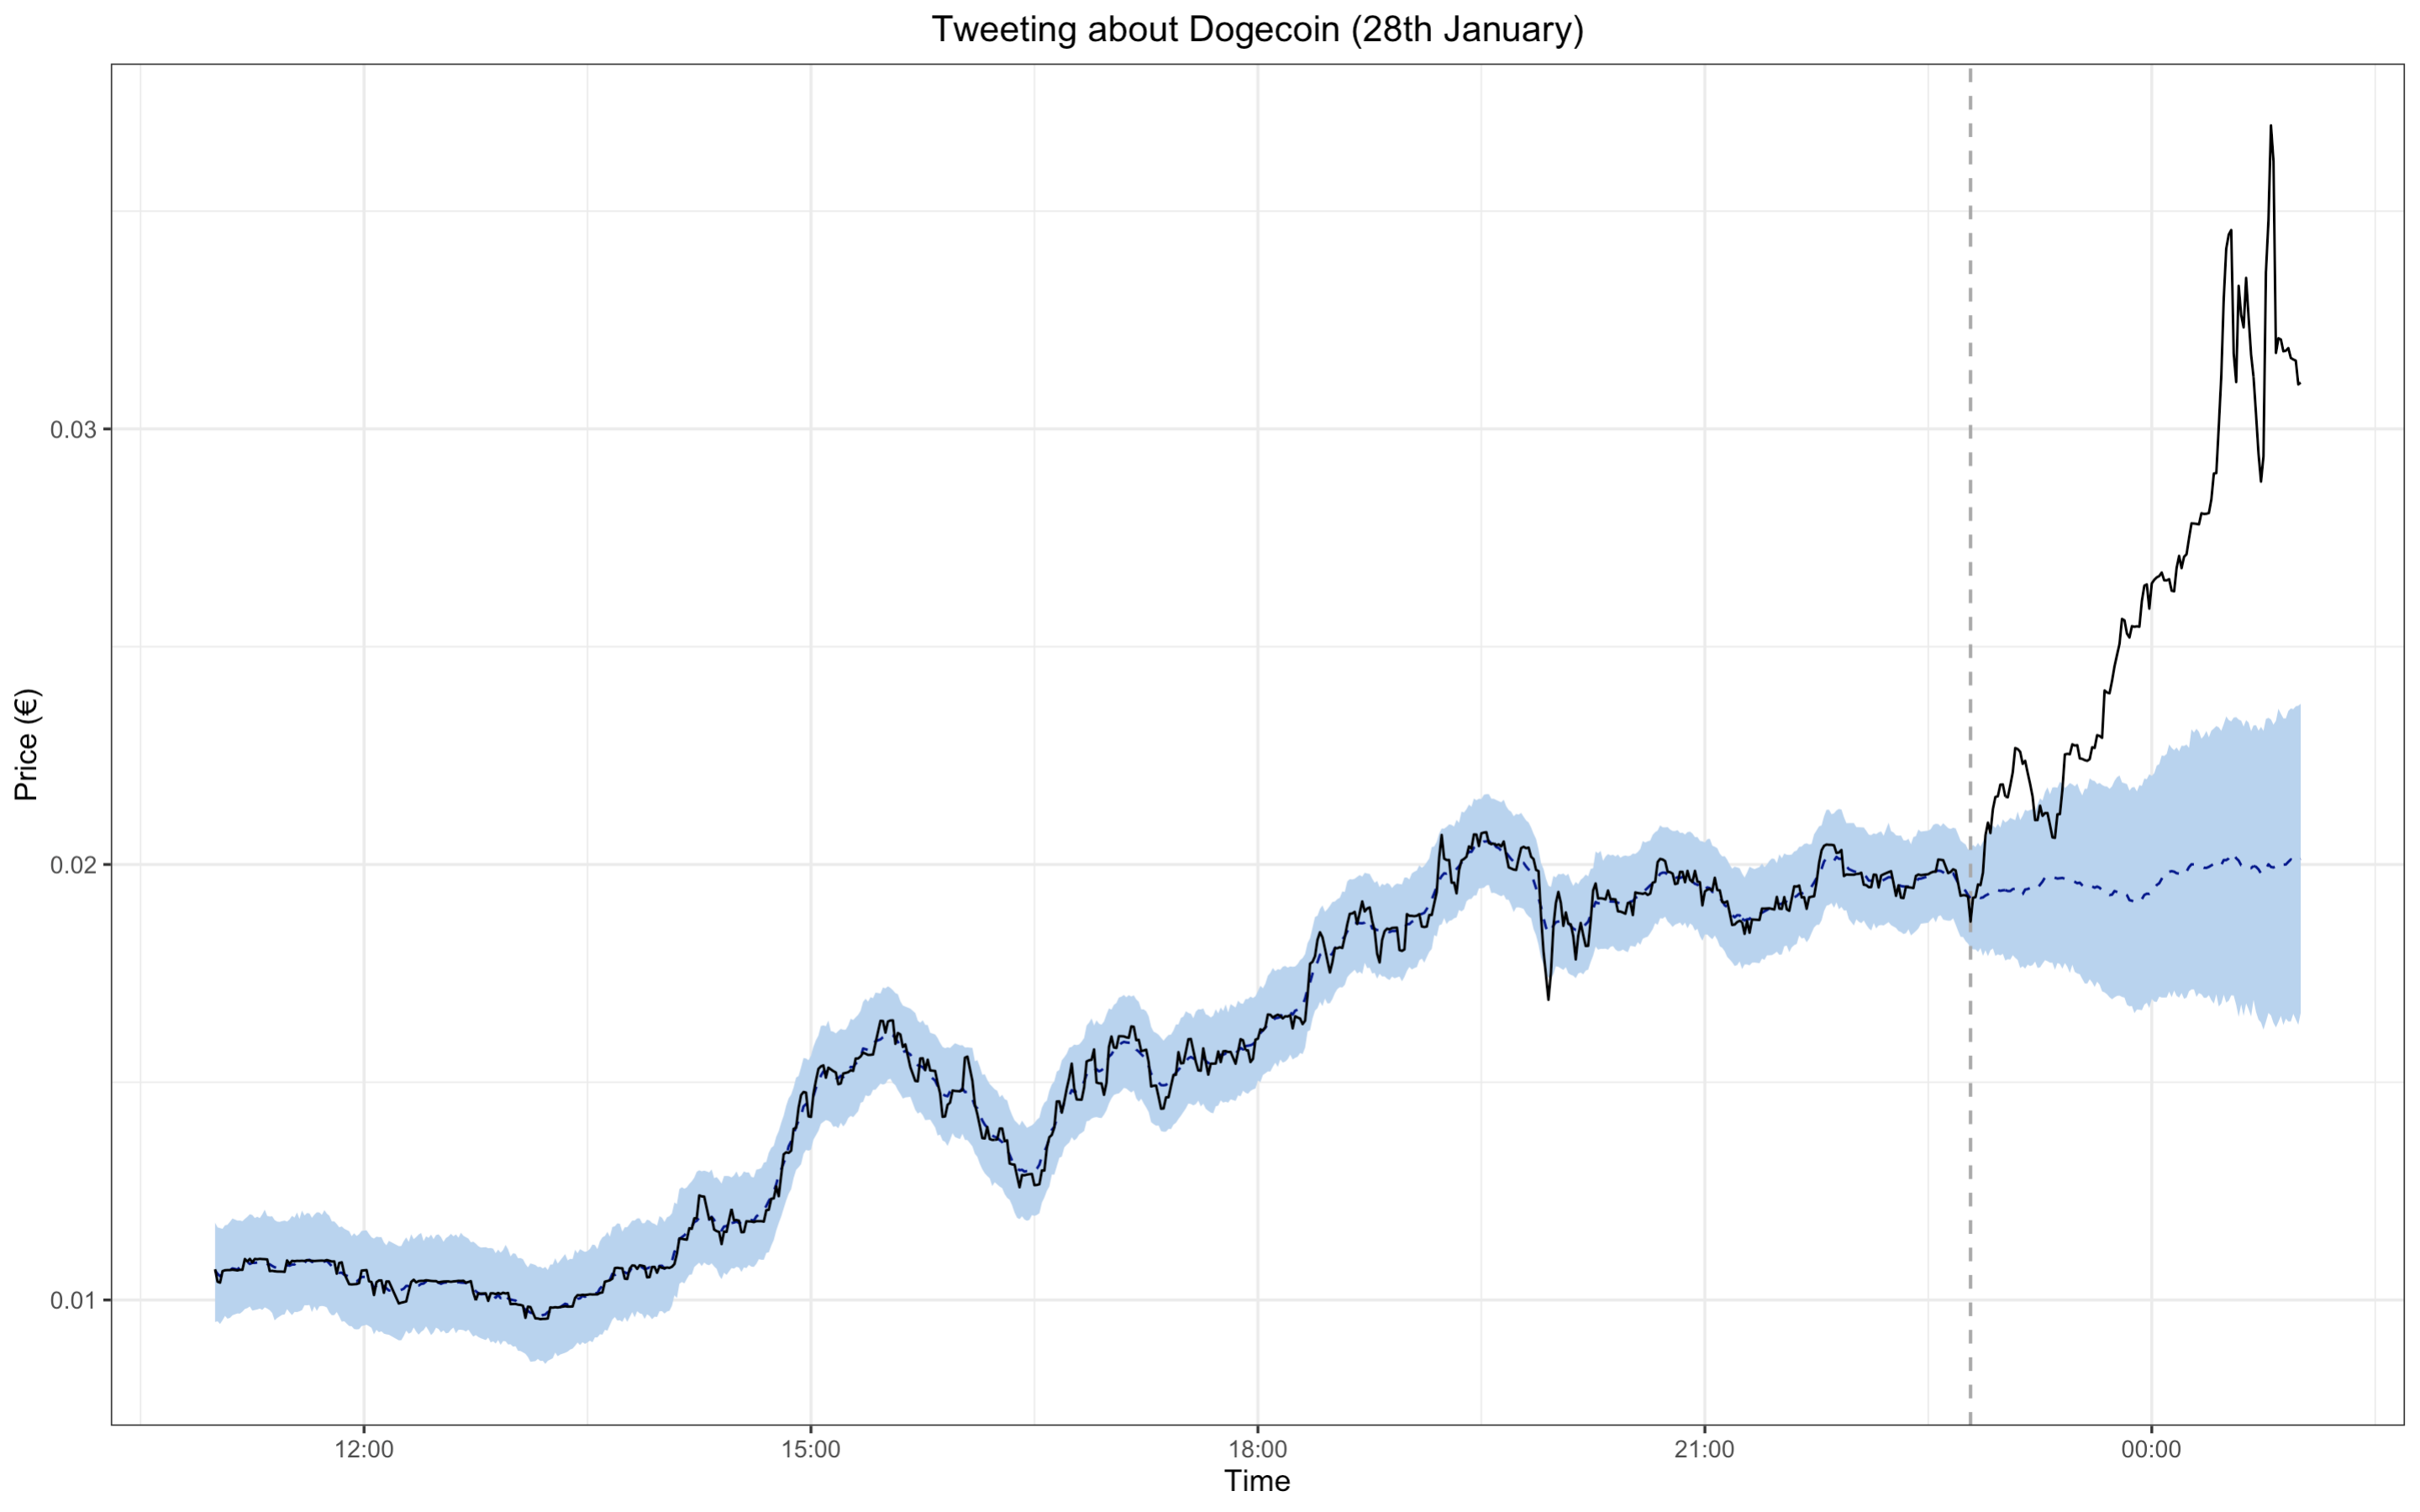  

(code for screenshot was replicated by Matthew Yep using Fabian Dablander's code in R, thank you Matt!).


This analysis was created using observed values 12 hours before the tweet from Doge and Bitcoin, all the way to a couple hours after the tweet; such high volatility during these moments of hype and FOMO would disrupt our analysis so we decided to observe from a shorter scope. 

We can see here that our Doge coin values - without outside intervention - were expected to be flat and slow growing, instead of the rapid growth that we see here, and continue to see hours after the original tweet.

Special thank you to Fabian Dablander, a Ph.D student Methods & Statistics, for creating the original analysis of Elon Musk and Dogecoin located [here](https://fabiandablander.com/r/Causal-Doge.html) and for allowing us to convert their blog post into a shareable notebook! Check out their other data science blog posts (Covid pandemic analysis, etc).

### Takeaways: 

- Single individuals (like Elon Musk) can have a huge impact on stock prices.
- Demand for products can be easily manipulated.
- Standardizing is a great tool for proportional comparisons and noting growth patterns
- The stock market is unpredictable; learn to cope with stock losses. 